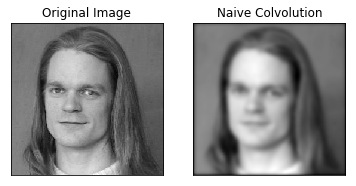

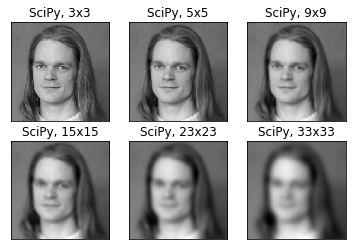

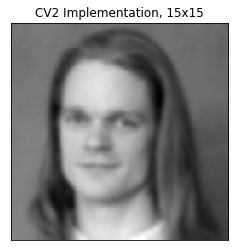

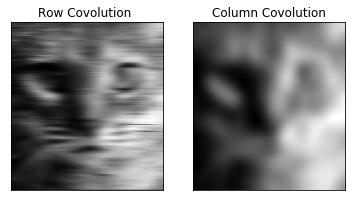

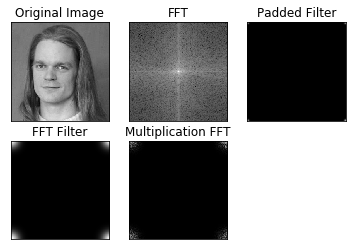

In [2]:
import numpy as np
import scipy.ndimage as ndImage
from scipy.signal import fftconvolve
from matplotlib import pyplot as plt
import cv2
from astropy.convolution import Gaussian2DKernel

myImg = cv2.imread('bauckhage.jpg',0)                           #Read image and convert into float
img = np.float32(myImg)                     
cat_img = cv2.imread('cat.png',0)
cat = np.float32(cat_img)
clock_img = cv2.imread('clock.jpg',0)
clock = np.float32(clock_img)

plt.figure()
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title("Original Image"), plt.xticks([]),                    #Plot the orginal Image
plt.yticks([])

#task 2.1.1 Naive Implementation
t = np.linspace(-10, 10, 30)                                    # 1-D  Gaussian
bump = np.exp(-0.1*t**2)
bump /= np.trapz(bump)                                          # Normalize the integral to 1
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]              # Make a 2-D kernel out of it
wrappedBorderImage = fftconvolve(img, kernel, mode='same')

plt.subplot(1,2,2),plt.imshow(wrappedBorderImage,cmap = 'gray')
plt.title("Naive Colvolution"), plt.xticks([]),                 #Plot the Wrapped Border Image
plt.yticks([])

#task 2.1.1 Scipy Implementation
position=1
plt.figure()
for i in [3,5,9,15,23,33]:                                      #Array of filter size                                    
    sigma = (i-1.) / (2*2.575)
    ndarray = ndImage.gaussian_filter(img, 
                                  sigma=sigma,
                                  order =0,mode='reflect',
                                  cval=0.0,truncate=4.0)        #Call gaussian_filter with parameters
    plt.subplot(2,3,position),plt.imshow(ndarray,cmap = 'gray') #Plot the Image 
    plt.title("SciPy, "+str(i)+ 'x'+str(i)), plt.xticks([]),plt.yticks([])               
    position=position+1

#task 2.1.1 CV2 Implementation
filter_size =15   
blur = cv2.GaussianBlur(img,(filter_size,filter_size),0)        #Call GaussianBlue with filter size
plt.figure()
plt.title("CV2 Implementation, "+str(filter_size)+'x'+str(filter_size)),
plt.xticks([]), plt.yticks([]),                                 #Plot the Image 
plt.imshow(blur, cmap = 'gray')                                 

#task 2.1.2
sigma = 10.                                                     #Calculate weights g
msize = int(np.ceil(sigma * 2.575) * 5 + 1)
x = np.arange(msize)
g = np.exp(-0.5 * ((x-msize/2) / sigma)**2)
g /= g.sum()
 
rowConvolution = ndImage.convolve1d(cat,
                                    g,
                                    axis=1,
                                    mode='reflect',             #axis=0 for row
                                    cval=0.0)      
columnConvolution = ndImage.convolve1d(rowConvolution,
                                       g,
                                       axis=0,mode='reflect',   #axis=1 for column
                                       cval=0.0)   


oneDConvRow=ndImage.gaussian_filter1d(rowConvolution,
                                      sigma=sigma,
                                      axis=0,
                                      order =0,
                                      mode='reflect',
                                      cval = 0.0,
                                      truncate =4.0)
#t = rowConvolution*columnConvolution
oneDConvColumn=ndImage.gaussian_filter1d(columnConvolution,
                                         sigma=sigma,
                                         axis =1,
                                         order =0,
                                         mode ='reflect',
                                         cval = 0.0,
                                         truncate =4.0)
#h = rowConvolution*columnConvolution

plt.figure()
plt.subplot(1,2,1),plt.imshow(rowConvolution,cmap = 'gray')        #Plot the Image 
plt.title("Row Covolution "), plt.xticks([]),plt.yticks([]) 
plt.subplot(1,2,2),plt.imshow(columnConvolution,cmap = 'gray')     #Plot the Image 
plt.title("Column Covolution"), plt.xticks([]),plt.yticks([]) 
 

#Task 2.1.3
fft_of_img = np.fft.fft2(img)
fShift_of_img = np.fft.fftshift(fft_of_img)                     #move zero frequency to the center of the spectrum
absValue_of_img = np.log10(abs(fShift_of_img))

plt.figure()
plt.subplot(2,3,1),plt.imshow(img,cmap = 'gray')                #Plot the Image 
plt.title("Original Image"), plt.xticks([]),plt.yticks([])
plt.subplot(2,3,2),plt.imshow(absValue_of_img,cmap = 'gray')    #Plot the Image 
plt.title("FFT"), plt.xticks([]),plt.yticks([])

gauss_kernel = Gaussian2DKernel(3)                              #Create 3x3 Kernel 
sz = (256, 256)                                                 #Image output size macthing with the original image
after_x = (sz[0] - gauss_kernel.shape[0])//2                    #Slice the kernel into 4 pieces
before_x = sz[0] - gauss_kernel.shape[0] - after_x
after_y = (sz[1] - gauss_kernel.shape[1])//2
before_y = sz[1] - gauss_kernel.shape[1] - after_y
gauss_kernel = np.pad(gauss_kernel, ((before_x, after_x), (before_y, after_y)), 'constant')
gauss_kernel = np.fft.ifftshift(gauss_kernel)
fft_of_gauss_kernel = np.fft.ifft2(gauss_kernel)
absValue_of_gauss_kernel = np.abs(fft_of_gauss_kernel)
K = fShift_of_img*fft_of_gauss_kernel
K = np.abs(K)

plt.subplot(2,3,3),plt.imshow(gauss_kernel,cmap = 'gray')                #Plot the Image 
plt.title("Padded Filter"), plt.xticks([]),plt.yticks([])
plt.subplot(2,3,4),plt.imshow(absValue_of_gauss_kernel,cmap = 'gray')    #Plot the Image 
plt.title("FFT Filter"), plt.xticks([]),plt.yticks([])
plt.subplot(2,3,5),plt.imshow(K,cmap = 'gray')                           #Plot the Image 
plt.title("Multiplication FFT"), plt.xticks([]),plt.yticks([])
plt.show()